# **Welcome to the Demo Notebook (*In Progress*)**

In this demo notebook we go through the `.py` modules used for the project and demonstrate their functionality.<br>


### **Step 1) The Dependencies**


In [1]:
# Basic libraries
import re
import os
import gc
import warnings
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()

'/home/RDC/anasashb/Dokumente/DEDA_class_SoSe2023-main/DEDA_class_SoSe2023_LDA_MSc_Theses'

In [ ]:
# Install Requirements
pip install -r requirements.txt

### **Step 2) The Scraper**
Import the master_theses_scraper from the freshly added `thesis_scraper.py` module, docstring of which is given below. The function is constructed deliberately to produce many `print()` statements along the way to let the users know what stage of the work they are on and how this or that entry currently being processed looks like.

Also, to note, the scraping implementation is designed in a way that is specifically targeted at the HU website, meaning it will need some tinkering inside for repurposing. 


In [3]:
# Import the custom function and inspect
from thesis_scraper import master_theses_scraper 
master_theses_scraper?

Signature: master_theses_scraper(url, down_dir, headers)
Docstring:
Scrapes master's theses from a specified URL, retrieves download links, and downloads the theses.

Args:
    url (str): The URL of the webpage containing the LvB theses.
    down_dir (str): The directory where the scraped PDFs will be downloaded.
    headers (dict): HTTP headers to be used in the requests.
File:      ~/Dokumente/DEDA_class_SoSe2023-main/DEDA_class_SoSe2023_LDA_MSc_Theses/thesis_scraper.py
Type:      function

In [4]:
# Specify the link to scrape
url = 'https://www.wiwi.hu-berlin.de/de/forschung/irtg/lvb/research/dmb'

# Sets the directory for downloading our scraped pdfs
down_dir = 'OCRed PDFs/'

# Makes the directory in case it does not exist already
os.makedirs(down_dir, exist_ok = True)


# Set your own user agent here after ' User-Agent' Google: what is my user agent
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64; rv:102.0) Gecko/20100101 Firefox/102.0',
    'Accept-Language': 'en-US'
}

In [5]:
# Run the function:
master_theses_scraper(url = url,
                      down_dir = down_dir,
                      headers = headers
)


Web page accessed.

244 entries found.

An example entry in our links container looks like:
 <a data-linktype="external" data-val="https://edoc.hu-berlin.de/handle/18452/24455" href="https://edoc.hu-berlin.de/handle/18452/24455">Comparing Cryptocurrency Indices to Traditional Indices</a>

Identifying invalid links...

51 invalid links identified.

193 entries remain.

Identifying Master's Theses...

124 Master's Theses identified.

A sample entry looks as follows:
 <a href="https://edoc.hu-berlin.de/handle/18452/23881">App-based Forecasting of CRIX Index Returns Using R and R-Shiny</a>

Retrieving download links...

Due to missing link, dropped entry: <a href="http://edoc.hu-berlin.de/master/ristig-alexander-2012-02-03">Modelling of Vector MEM with Hierarchical Archimedean Copula</a>

Due to missing link, dropped entry: <a href="http://edoc.hu-berlin.de/master/schelisch-martin-2011-06-10">Jumps in High Frequency Data</a>

Due to missing link, dropped entry: <a href="http://edoc.hu-ber

## **Step 3) Pre-Processing**

1. The first thing that needs to be done is to gather all English-language entries among our PDF files.
For this purpose, we have defined a function `en_detect` in the `lang_detect` module, which takes as argument our directory and the files inside, scans them and removes the non-English language entries (e.g. German entries).<br>

In [6]:
# Set folder as needed. 
folder = 'OCRed PDFs'
theses = os.listdir(folder) 


In [7]:
from lang_detect import en_detect
en_detect?

Signature: en_detect(folder=None, theses=None)
Docstring:
Goes through the scraped and downloaded PDF files and scans them to see if they are in English. 
This is necessary because some of the documents are in German (and some are unreadable).
To save memory, automatically selected to check pages 8, 12, 16, 20, 24; which should in all likelihood cases be body of text.
File:      ~/Dokumente/DEDA_class_SoSe2023-main/DEDA_class_SoSe2023_LDA_MSc_Theses/lang_detect.py
Type:      function

In [8]:
english_list = en_detect(folder, theses)


Current working directory: /home/RDC/anasashb/Dokumente/DEDA_class_SoSe2023-main/DEDA_class_SoSe2023_LDA_MSc_Theses

Currently working on 4.master_hauesler_konstantin.pdf_2021-03-05.pdf.

4.master_hauesler_konstantin.pdf_2021-03-05.pdf was identified as English.

Currently working on 34.weber.pdf_2015-12-09.pdf.

34.weber.pdf_2015-12-09.pdf was identified as English.

Currently working on 7.master_matic_jovanka.pdf_2020-06-24.pdf.

7.master_matic_jovanka.pdf_2020-06-24.pdf was identified as English.

Currently working on 49.bommes.pdf_2015-03-01.pdf.

49.bommes.pdf_2015-03-01.pdf was identified as English.

Currently working on 9.master_uenal_cemre.pdf_2019-08-13.pdf.

9.master_uenal_cemre.pdf_2019-08-13.pdf was identified as English.

Currently working on 10.Masterarbeit_Bricke_Thomas.pdf_2019-06-27.pdf.

10.Masterarbeit_Bricke_Thomas.pdf_2019-06-27.pdf removed from directory.

Currently working on 45.zhang.pdf_2015-03-31.pdf.

45.zhang.pdf_2015-03-31.pdf was identified as English.



In [41]:
# Clean memory
import gc
gc.collect()

531707

With $10$ papers dropped, that leaves the amount of  papers at $122$, decreased from the original $121$ scraped and additional $11$ sourced from CDs and scanning the physical documents.

*Note:* We additionally (manually) drop `118.su` because it kept crashing the function at any pc we ran it from. We also manually cropped `113.aydinli` in half since half of the papers was code.

In the end we have $121$ papers.

2. Now we move on to the preprocessing part using the function `preprocess_text` from text_prep.py

What does the function do?

For every document in our directory it:
- makes text lower case
- removes non alphabetic characters
- removes stop words
- removes single-character words and other possible PDF reading mistakes
- lemmatizes words
- renders the processed theses as `.txt` files

This helps significantly reduce dimensions and get rid of noise in our data.

**Additional Functionality (Somewhat Costly):**

We have further included additional, but fairly computationally costly, funcitionality within the function that can be turned on by setting argument `verbose = True`.

Using this, the function will save and count the word tokens at every stage of the preprocessing and automately generate plots for additional insight into the dimensionality reduction process.


In [10]:
# Import function
from text_prep import preprocess_text

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/RDC/anasashb/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /home/RDC/anasashb/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/RDC/anasashb/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/RDC/anasashb/nltk_data...


In [11]:
# See function arguments
preprocess_text?

Signature:
preprocess_text(
    first_input_folder=None,
    theses=None,
    inter_output_folder=None,
    verbose=False,
)
Docstring:
Preprocesses the PDF files by making everything lowercase,
getting rid of non-alphabetic words, removing stopwords,
tokenizing, lemmatizing, removing words with less than 3 character.

Args:
    first_input_folder (str): Path to the folder containing the PDF files.
    
    theses: os.listdir(folder).
            
    inter_output_folder (str): Intermediate output folder to save the filtered theses.
            
    verbose (bool): Returns vizualizations and information about dimensionality reduction. Can be set to False to save computational power, memory and time when working with large corpora of files.

Returns:
    None. Filthered theses saved in new folder.
File:      ~/Dokumente/DEDA_class_SoSe2023-main/DEDA_class_SoSe2023_LDA_MSc_Theses/text_prep.py
Type:      function

In [12]:
# Set folders as needed. 
first_input_folder = 'OCRed PDFs'
theses = os.listdir(first_input_folder) 
inter_output_folder = 'Filtered Theses'
os.makedirs(inter_output_folder, exist_ok = True)


Current working directory: /home/RDC/anasashb/Dokumente/DEDA_class_SoSe2023-main/DEDA_class_SoSe2023_LDA_MSc_Theses

Currently working on 4.master_hauesler_konstantin.pdf_2021-03-05.pdf.

Currently working on 34.weber.pdf_2015-12-09.pdf.

Currently working on 7.master_matic_jovanka.pdf_2020-06-24.pdf.

Currently working on 49.bommes.pdf_2015-03-01.pdf.

Currently working on 9.master_uenal_cemre.pdf_2019-08-13.pdf.

Currently working on aydinli cropped_2004-07-15.pdf.

Currently working on 45.zhang.pdf_2015-03-31.pdf.

Currently working on 13.master_pulec_vojtech.pdf_2019-02-25.pdf.

Currently working on 14.master_pulec_vojtech.pdf_2019-02-25.pdf.

Currently working on 15.masterarbeit_mitkov_ivan.pdf_2019-02-06.pdf.

Currently working on 35.steck.pdf_2015-12-09.pdf.

Currently working on 18.master_keilbar_georg.pdf_2018-08-03.pdf.

Currently working on 19.master_pollack_david.pdf_2018-06-29.pdf.

Currently working on 20.master_kolesnikova_alisa.pdf_2018-07-13.pdf.

Currently working on 

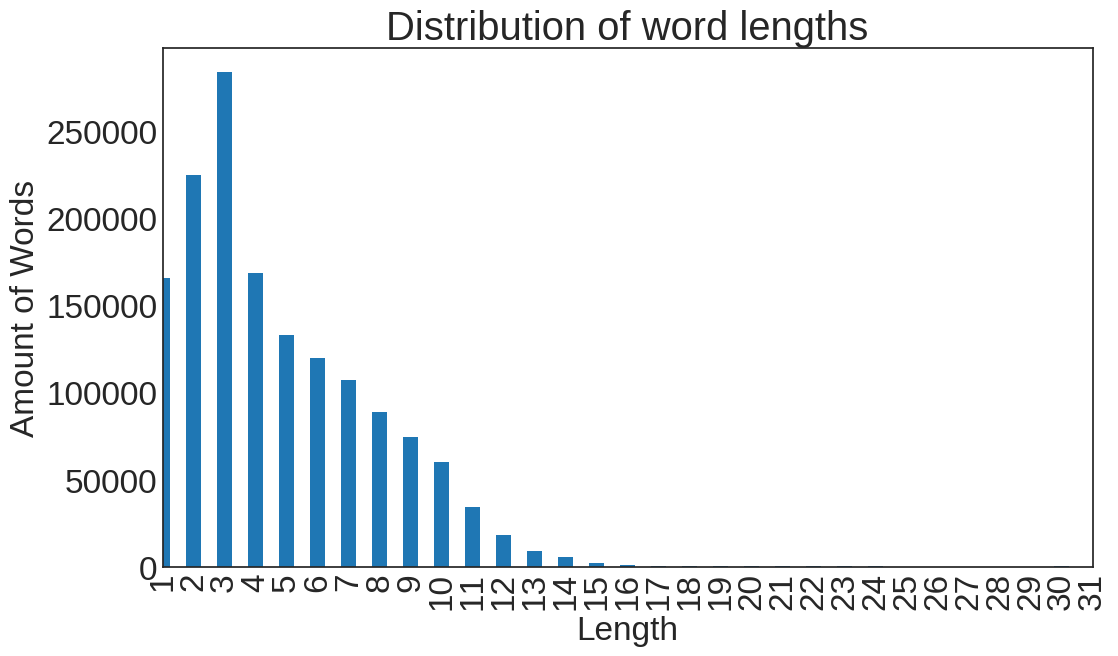


Total amount of words before dropping single character words: 1514969 


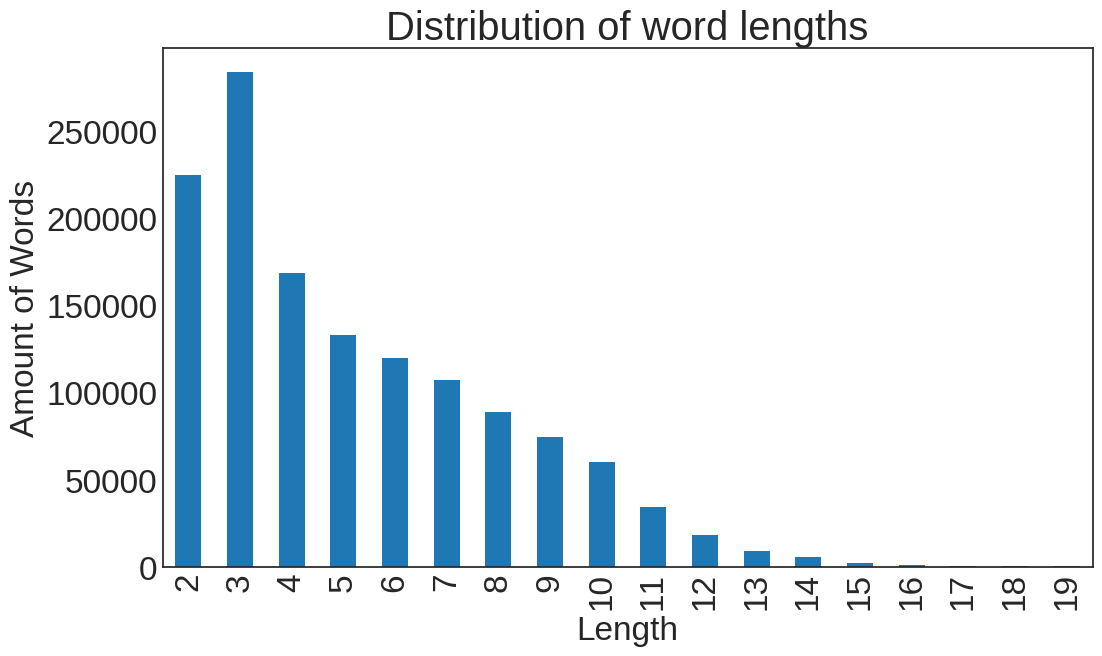


Total amount of words after dropping single character words and other pdf reader mistakes: 1336137 


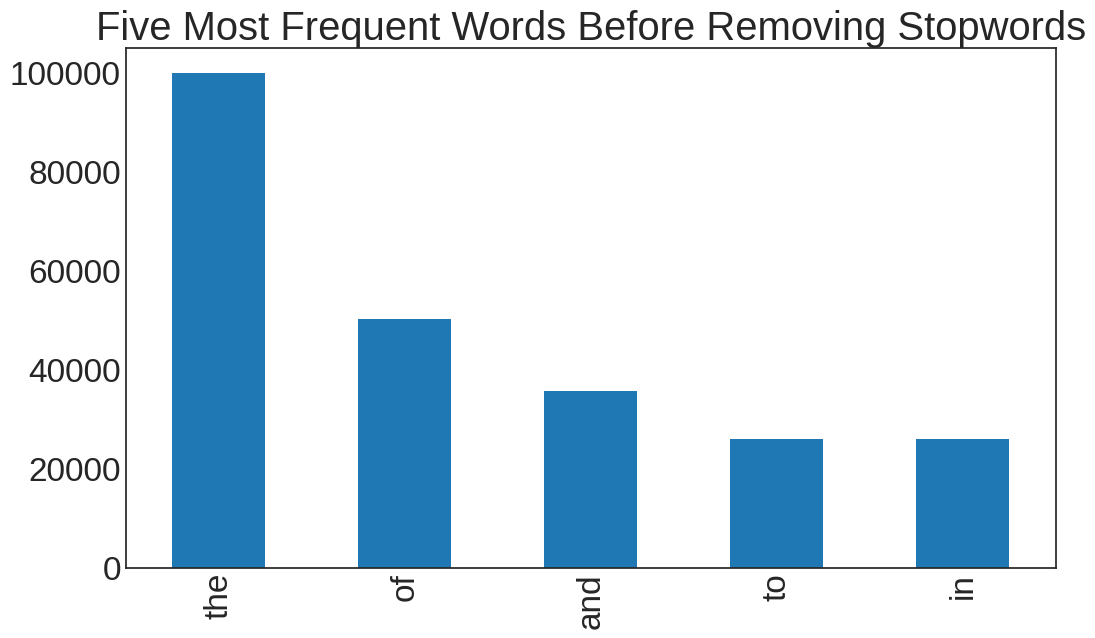


Total amount of words before removing stopwords: 1336137


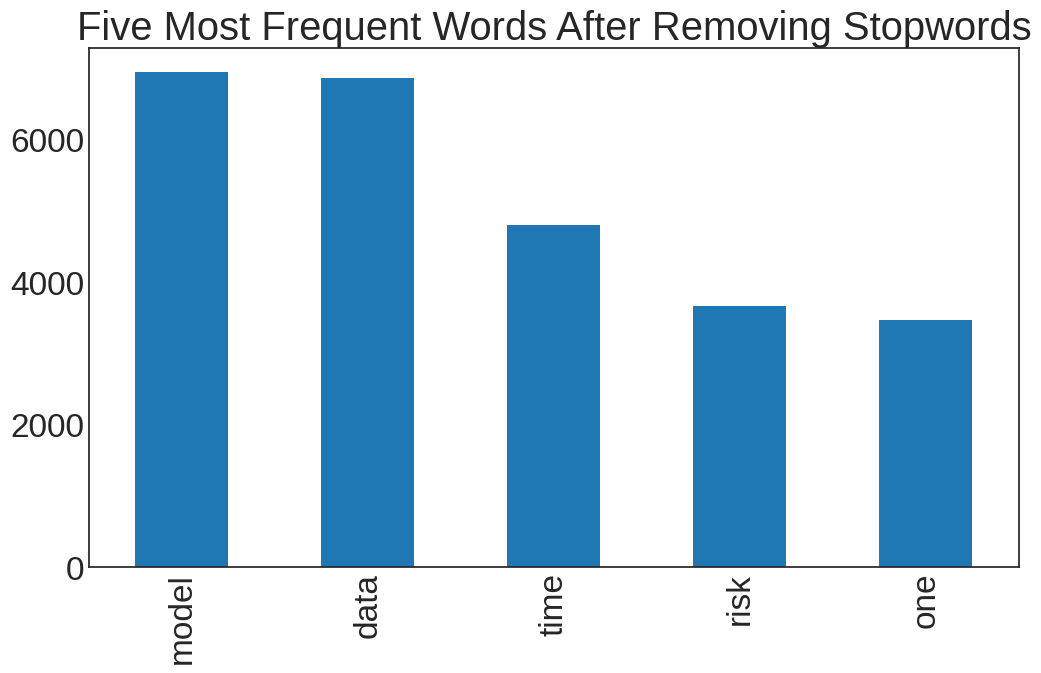


Total amount of words after removing stopwords: 823030


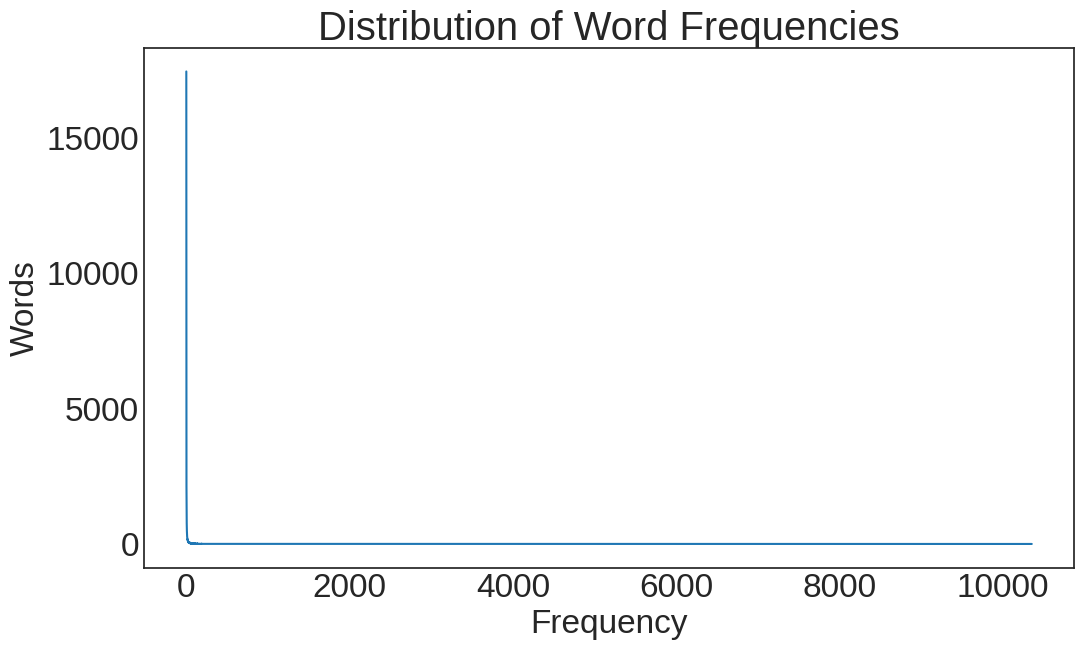

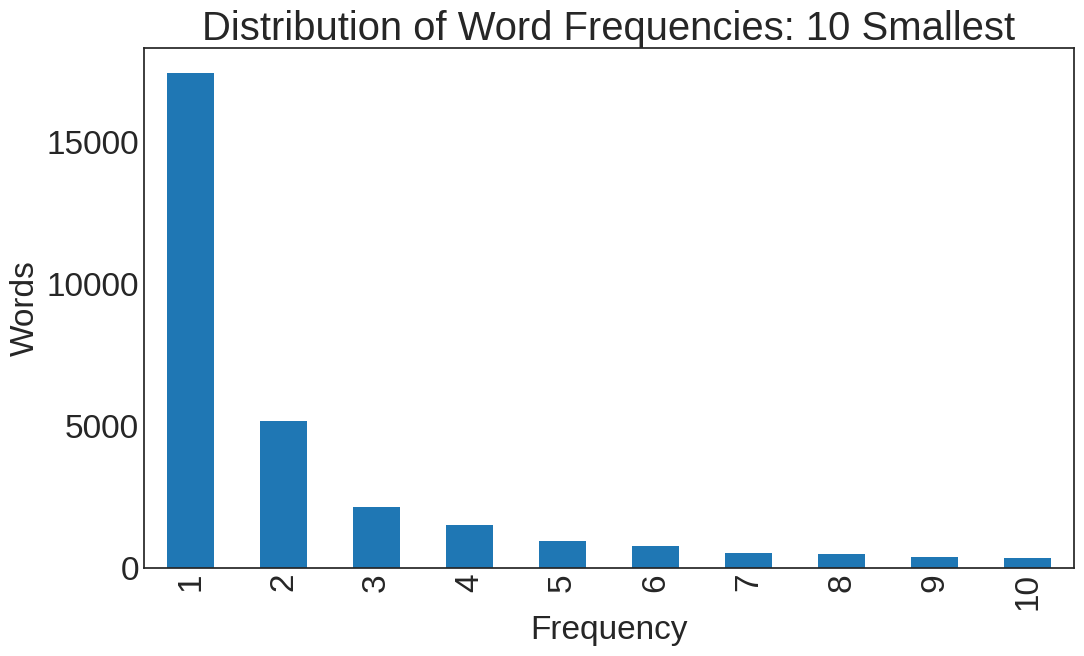




Preprocessing succesfully completed.



In [13]:
preprocess_text(first_input_folder, theses, inter_output_folder, verbose = True)


## Step 4) Making the corpus

For this we use the customly designed  `CorpusMaker` class, which includes three methods.

```python

CorpusMaker.make_corpus: 'Sets up the corpus, returns corpus, dictionary, ID mapping and texts. The returns are pickled and automatically saved to folder DICT_CORP.'
CorpusMaker.show_top_words: 'Prints selected amount of most frequent words per thesis.'
CorpusMaker.make_wordcloud: 'Generates word cloud image. The image is automatically saved to the Plots folder.'


In [14]:
# Import the class
from corpus_maker import CorpusMaker

In [15]:
# Inspect the class
CorpusMaker?

Init signature: CorpusMaker(input_folder)
Docstring:     
A class used for turning the filtered LvB MSc theses into a corpus. Generally, this class can also be used to generate a corpus from any set of .txt files that have already gone through standard NLP preprocessing. 

Outputs are saved as pickle files in automatically generated folder DICT_CORP.

Args:
    input_folder (str): The folder containing the filtered MSc theses. (Should set to the output of the preprocessing function)
    
Attributes:
    dictionary: A dictionary generated using Gensim.
    dictionary_token2id: A mapping of tokens to IDs.
    corpus: BoW corpus generated from the theses. 
    texts: All tokens (used for coherence later on)
    dates: Returns dates list for theses
    
Methods:
    make_corpus: Processes the filtered theses texts, drops rare words overall, creates corpus.
    show_top_words: Prints the most frequent words per thesis in the corpus
    make_wordcloud: Generates a wordcloud image from the co

In [16]:
corp_maker = CorpusMaker(input_folder = 'Filtered Theses')

In [17]:
dictionary, dictionary_token2id, corpus, texts, dates = corp_maker.make_corpus()


Creating corpus...

After removing 27770 rare words, total amount of words in the preprocessed texts decreased from 820804 to 793034

Corpus succesfully created.


In [18]:
corp_maker.show_top_words(amount = 5)


Thesis 1

bond: 356

return: 208

risk: 166

market: 126

rate: 118


Thesis 2

time: 90

rome: 57

year: 47

london: 43

paris: 42


Thesis 3

kernel: 187

pricing: 178

volatility: 149

new: 137

vdax: 131


Thesis 4

band: 87

nq: 84

confidence: 63

epk: 56

risk: 43


Thesis 5

recipe: 179

model: 177

user: 112

item: 79

base: 68


Thesis 6

good: 137

model: 114

music: 112

virtual: 105

variable: 103


Thesis 7

variance: 165

swap: 100

volatility: 81

index: 80

strategy: 56


Thesis 8

model: 250

option: 181

price: 156

hedge: 130

volatility: 125


Thesis 9

model: 224

volatility: 206

network: 151

neural: 129

har: 117


Thesis 10

distribution: 130

density: 123

ic: 108

var: 96

estimate: 83


Thesis 11

label: 248

topic: 142

document: 141

distribution: 125

lda: 113


Thesis 12

model: 164

test: 102

quantile: 100

period: 84

machine: 80


Thesis 13

factor: 280

return: 190

risk: 176

market: 160

model: 152


Thesis 14

double: 566

int: 221

matrice: 16

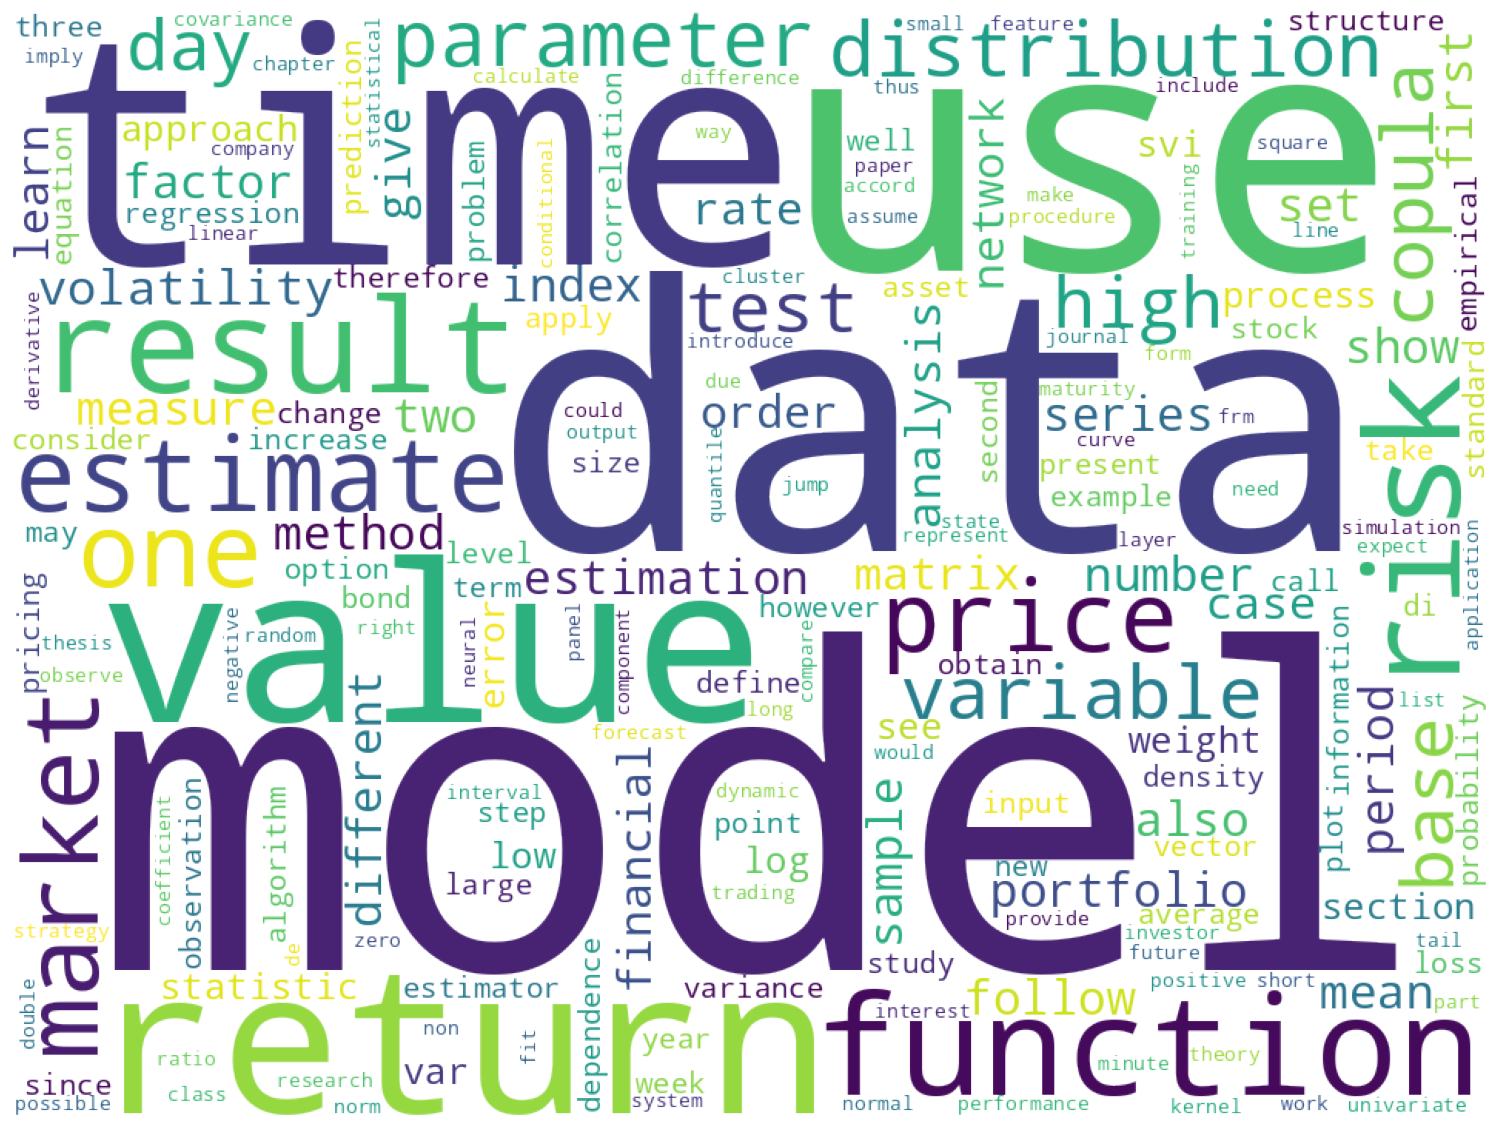

In [19]:
corp_maker.make_wordcloud()

## Step 5) LDA Class

We have defined a custom LDA class `LDA`, aimed at designing a simple,  user-friendly interface for carrying out LDA with grid search. 

As arguments, it takes `corpus`, `dictionary`, `texts` generated by the `CorpusMaker` class.

The class includes five methods:

```python

LDA.simple_fit(): 'Fits an LDA model with user\'s specifications.'
LDA.gird_search(): 'Carries out a grid search per user\'s specified parameters.'
LDA.lineplot_scores(): 'Plots coherence and perplexity scores per alpha and beta values and topic numbers.'
LDA.build_best_model(): 'Fits the best model obtained in grid search.'
LDA.viz(): 'Visualizes model obtained by either simple_fit or build_best_model methods.'


In [2]:
from LDA_with_Grid import LDA

In [3]:
LDA?

Init signature: LDA(corpus, dictionary, texts, dates)
Docstring:     
A custom LDA interface designed to carry out a grid search, find the best model and vizualize it. 
Grid search carried out per coherence instead of perplexity, as optimizing for the latter may not lead to "human interpretable topics."

Args:

    corpus: A bag of words corpus (Already generated by CorpusMaker)
    dictionary: A gensim dictionary (Already generated by CorpusMaker)
    texts: All tokens (Already generated by CorpusMaker)
    
How to use:
    
    MSc_LDA = LDA(corpus, dictionary, texts) <-- initializes the class
    m = MSc_LDA.simple_fit() <-- fits one model with custom specs
    MSc_LDA.grid_search(n_topics, alphas, betas) <-- conducts grid search
    MSc_LDA.lineplot_scores() <-- plots coherence scores from grid search rounds
    m = MSc_LDA.build_best_model() <-- fits best model
    MSc_LDA.viz() <-- vizualizes best/simple model
    bes
File:           ~/Dokumente/DEDA_class_SoSe2023-main/DEDA_clas

### Using the `.simple_fit()`

*Note:* It is possible to run the code below directly by opening the pickled files with the code, essentially skipping the scraping and automated, as well as manual pre-processing steps.

```python
import pickle

with open('DICT_CORP/corpus.pkl', 'rb') as file:
    corpus = pickle.load(file)
    
with open('DICT_CORP/dictionary_token2id.pkl', 'rb') as file:
    dictionary_token2id = pickle.load(file)
    
with open('DICT_CORP/dictionary.pkl', 'rb') as file:
    dictionary = pickle.load(file)
    
with open('DICT_CORP/texts.pkl', 'rb') as file:
    texts = pickle.load(file)


In [4]:
# Copy the code here if needed
import pickle

with open('DICT_CORP/corpus.pkl', 'rb') as file:
    corpus = pickle.load(file)
    
with open('DICT_CORP/dictionary_token2id.pkl', 'rb') as file:
    dictionary_token2id = pickle.load(file)
    
with open('DICT_CORP/dictionary.pkl', 'rb') as file:
    dictionary = pickle.load(file)
    
with open('DICT_CORP/texts.pkl', 'rb') as file:
    texts = pickle.load(file)

with open('DICT_CORP/dates.pkl', 'rb') as file:
    dates = pickle.load(file)

In [6]:
# Initialize
MSc_LDA = LDA(corpus, dictionary, texts, dates)

In [7]:
# Set up a single model with ten topics, alpha of 
n_top = 10
alpha_val = 'symmetric'
beta_val = 0.6

simple_m = MSc_LDA.simple_fit(n_top = n_top,
                             alpha_val = alpha_val,
                             beta_val = beta_val)


Coherence Score is: 0.4345560057316882

Perplexity Score is: -7.584112228892933

See the topics:
(0, '0.033*"copula" + 0.014*"parameter" + 0.013*"value" + 0.013*"dependence" + 0.012*"estimate" + 0.010*"model" + 0.009*"distribution" + 0.008*"use" + 0.008*"time" + 0.007*"estimation"')
(1, '0.011*"data" + 0.009*"model" + 0.008*"use" + 0.007*"variable" + 0.007*"value" + 0.006*"method" + 0.005*"one" + 0.005*"cluster" + 0.005*"result" + 0.004*"analysis"')
(2, '0.014*"model" + 0.010*"distribution" + 0.009*"estimator" + 0.007*"inc" + 0.007*"use" + 0.007*"data" + 0.007*"variable" + 0.007*"estimation" + 0.006*"estimate" + 0.006*"return"')
(3, '0.023*"model" + 0.013*"day" + 0.011*"svi" + 0.010*"price" + 0.009*"week" + 0.007*"volatility" + 0.007*"time" + 0.007*"result" + 0.006*"period" + 0.005*"jump"')
(4, '0.011*"function" + 0.009*"estimate" + 0.009*"risk" + 0.008*"market" + 0.008*"use" + 0.008*"pricing" + 0.008*"model" + 0.007*"utility" + 0.007*"return" + 0.007*"time"')
(5, '0.026*"private" + 0

In [8]:
# Vizualize model
MSc_LDA.viz(model_type = 'simple') 

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.025394 -0.020895       1        1  16.415577
1     -0.020660 -0.039072       2        1  15.975386
2      0.061828  0.008090       3        1  14.659674
4      0.075779 -0.024197       4        1  12.377121
9      0.062423  0.034053       5        1  10.016904
8     -0.051676 -0.103594       6        1   8.660414
0      0.113833 -0.028189       7        1   8.076425
6     -0.044812 -0.040085       8        1   6.905498
5     -0.009477  0.199205       9        1   3.718368
7     -0.212632  0.014682      10        1   3.194633, topic_info=         Term         Freq        Total Category  logprob  loglift
4352   copula  2664.000000  2664.000000  Default  30.0000  30.0000
923    return  3852.000000  3852.000000  Default  29.0000  29.0000
930      risk  3323.000000  3323.000000  Default  28.0000  28.0000
834   private   847.000000   847.000000  Default  27.0000  27.0000
2017   equity   878.000000   878.000000  Default  26.0000  26.0000
...       ...          ...          ...      ...      ...      ...
1536     thus   103.056354   938.151668  Topic10  -5.5046   1.2351
547     index    99.264298  1573.404408  Topic10  -5.5421   0.6805
1150      use   110.722115  5172.170156  Topic10  -5.4329  -0.4003
830     price   102.591327  2684.011196  Topic10  -5.5092   0.1794
923    return    98.896110  3852.242227  Topic10  -5.5459  -0.2186

[694 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
10921      1  0.038624  acceptance
10921      2  0.009656  acceptance
10921      3  0.009656  acceptance
10921      5  0.898016  acceptance
10921      8  0.009656  acceptance
...      ...       ...         ...
3552       1  0.028650       young
3552       2  0.038200       young
3552       3  0.009550       young
3552       8  0.019100       young
3552       9  0.888142       young

[3447 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 5, 10, 9, 1, 7, 6, 8])

### Using the `.grid_search()` and `.build_best_model()`

*Note to Timur:* The grid parameter set up in the block below is just for demonstrational purposes, 

For better grid search try (even consider smaller steps with alphas and betas):

```python

n_topics = list(range(2, 20))
alphas = np.arange(0.1, 1, 0.1).tolist()
betas = np.arange(0.1, 1, 0.1).tolist()



#### 1st iteration

In [10]:

# Set up parameter grid 
#n_topics = list(range(2, 10))
#alphas = np.arange(0.1, 1, 0.2).tolist()
#betas = np.arange(0.1, 1, 0.2).tolist()
n_topics = range(2,30)
alpha = ['symmetric']
beta = ['auto']

## I append these two by hand to the gird
# because I'm not skilled enough to have included them in the upper lines of code
#alphas.append('symmetric')
#betas.append('auto')


**About the verbose argument:**

The verbose argument here just activates print statements that show the coherence score per round of the search. Even if set to false, the outputs will be saved as a CSV file. 

In [11]:
# Do the grid search
MSc_LDA.grid_search(n_topics, alpha, beta, verbose = True)

# Setting verbose = True ensures the function output 


Number of topics: 2; alpha: symmetric; beta: auto; Achieved coherence score: 0.3511387363685848

Number of topics: 3; alpha: symmetric; beta: auto; Achieved coherence score: 0.30658923247415437

Number of topics: 4; alpha: symmetric; beta: auto; Achieved coherence score: 0.35312430431607633

Number of topics: 5; alpha: symmetric; beta: auto; Achieved coherence score: 0.37425188178949526

Number of topics: 6; alpha: symmetric; beta: auto; Achieved coherence score: 0.3511746136670522

Number of topics: 7; alpha: symmetric; beta: auto; Achieved coherence score: 0.38641671975071057

Number of topics: 8; alpha: symmetric; beta: auto; Achieved coherence score: 0.41477279724663035

Number of topics: 9; alpha: symmetric; beta: auto; Achieved coherence score: 0.44659222952789573

Number of topics: 10; alpha: symmetric; beta: auto; Achieved coherence score: 0.41925113705653533

Number of topics: 11; alpha: symmetric; beta: auto; Achieved coherence score: 0.4434464453782144

Number of topics: 12

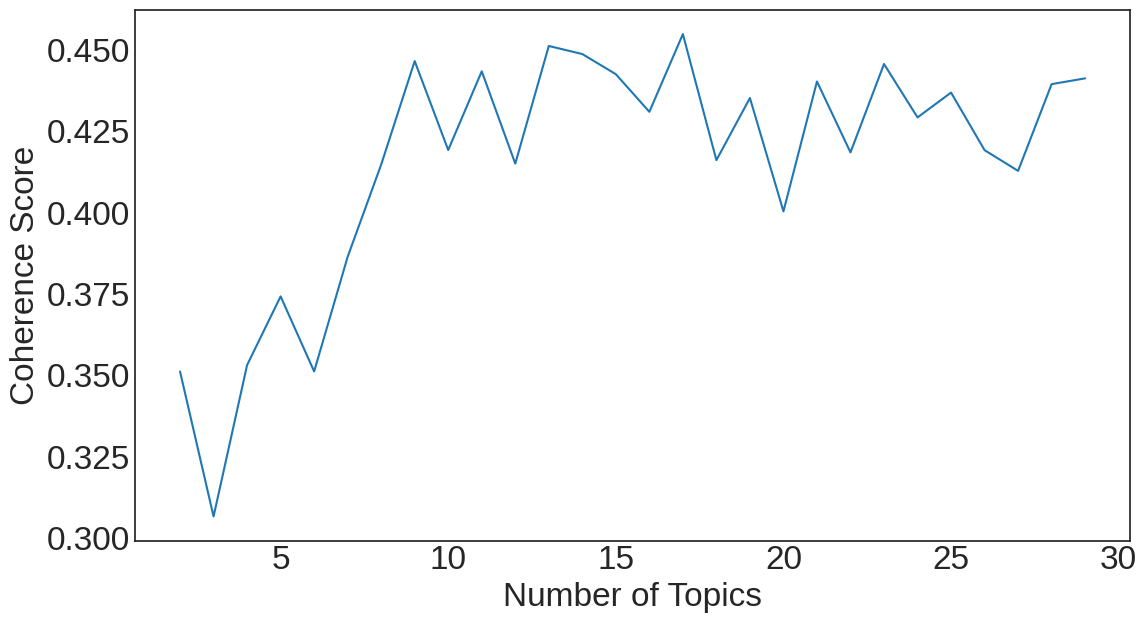

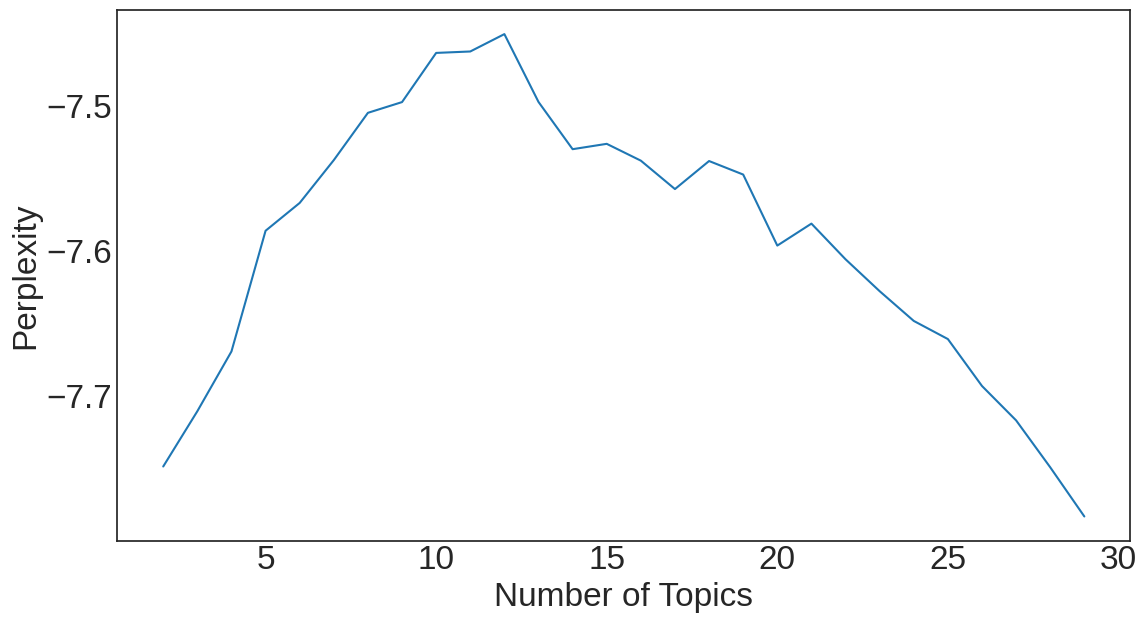

In [12]:
# Plot the scores
MSc_LDA.lineplot_scores()

In [13]:
# call best model
best_m = MSc_LDA.build_best_model()

(0, '0.038*"copula" + 0.018*"parameter" + 0.016*"value" + 0.013*"estimate" + 0.012*"dependence" + 0.011*"model" + 0.010*"gumbel" + 0.010*"estimator" + 0.010*"test" + 0.009*"clayton"')
(1, '0.014*"data" + 0.010*"cluster" + 0.010*"function" + 0.009*"value" + 0.008*"loss" + 0.007*"variable" + 0.006*"use" + 0.006*"earthquake" + 0.006*"price" + 0.006*"model"')
(2, '0.026*"return" + 0.022*"private" + 0.022*"equity" + 0.014*"company" + 0.014*"test" + 0.012*"public" + 0.011*"beta" + 0.010*"firm" + 0.010*"data" + 0.010*"risk"')
(3, '0.026*"model" + 0.026*"day" + 0.025*"svi" + 0.021*"week" + 0.013*"period" + 0.013*"di" + 0.011*"learn" + 0.011*"univariate" + 0.011*"result" + 0.010*"minute"')
(4, '0.014*"energy" + 0.012*"data" + 0.012*"market" + 0.011*"consumption" + 0.010*"function" + 0.010*"use" + 0.009*"may" + 0.008*"utility" + 0.008*"model" + 0.008*"error"')
(5, '0.022*"network" + 0.014*"layer" + 0.011*"model" + 0.011*"use" + 0.011*"neural" + 0.009*"data" + 0.009*"learn" + 0.007*"function" + 0

In [14]:
# Viz best model by setting model_type = 'best'
MSc_LDA.viz(model_type = 'best')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16    -0.039699  0.013006       1        1  13.467590
14     0.080438 -0.003705       2        1  12.043352
3     -0.024680  0.045736       3        1   7.042988
11    -0.092237  0.010289       4        1   6.948043
0     -0.114312 -0.042574       5        1   6.518725
1      0.023591 -0.092960       6        1   6.095307
4      0.037937  0.032387       7        1   5.819457
9     -0.050144  0.077301       8        1   5.538573
15    -0.121807 -0.025261       9        1   5.323848
8      0.156114 -0.064256      10        1   4.782716
13    -0.079556 -0.025832      11        1   4.668406
7      0.103187  0.236676      12        1   4.437088
2     -0.061123  0.053084      13        1   4.274158
6      0.024456 -0.066473      14        1   4.007889
10    -0.094644 -0.004032      15        1   3.638741
5      0.163327  0.008289      16        1   3.444991
12     0.089151 -0.151673      17        1   1.948126, topic_info=          Term         Freq        Total Category  logprob  loglift
4352    copula  2973.000000  2973.000000  Default  30.0000  30.0000
2647   network  1964.000000  1964.000000  Default  29.0000  29.0000
6421       svi  1394.000000  1394.000000  Default  28.0000  28.0000
1157  variable  2987.000000  2987.000000  Default  27.0000  27.0000
930       risk  3754.000000  3754.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
744        one   115.684603  3658.667057  Topic17  -4.8945   0.4843
463   function   115.279759  4362.695843  Topic17  -4.8980   0.3048
157       case    94.018937  1748.017151  Topic17  -5.1018   1.0156
1150       use   114.885520  5791.950038  Topic17  -4.9014   0.0180
922     result    88.165121  3712.289036  Topic17  -5.1661   0.1981

[1288 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1923      1  0.064884   ac
1923      2  0.016221   ac
1923      3  0.027035   ac
1923      4  0.605585   ac
1923      5  0.097326   ac
...     ...       ...  ...
1578     13  0.010869   zu
1578     14  0.003623   zu
1578     15  0.018115   zu
1578     16  0.010869   zu
1578     17  0.021738   zu

[4788 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 15, 4, 12, 1, 2, 5, 10, 16, 9, 14, 8, 3, 7, 11, 6, 13])

#### 2nd iteration

In [17]:
# Set up parameter grid 

n_topics = [12]
alphas = np.arange(0.1, 1, 0.2).tolist()
betas = np.arange(0.1, 1, 0.2).tolist()

## I append these two by hand to the gird
# because I'm not skilled enough to have included them in the upper lines of code
alphas.append('symmetric')
betas.append('auto')

In [18]:
#remove the assigned best score from the previous iteration
MSc_LDA.best_score = -1

# Do the grid search
MSc_LDA.grid_search(n_topics, alphas, betas, verbose = True)

# Setting verbose = True ensures the function output 


Number of topics: 12; alpha: 0.1; beta: 0.1; Achieved coherence score: 0.413796219688536

Number of topics: 12; alpha: 0.1; beta: 0.30000000000000004; Achieved coherence score: 0.43791194416902485

Number of topics: 12; alpha: 0.1; beta: 0.5000000000000001; Achieved coherence score: 0.4132710209678035

Number of topics: 12; alpha: 0.1; beta: 0.7000000000000001; Achieved coherence score: 0.43414907734786184

Number of topics: 12; alpha: 0.1; beta: 0.9000000000000001; Achieved coherence score: 0.43533525226687847

Number of topics: 12; alpha: 0.1; beta: auto; Achieved coherence score: 0.4150640476336598

Number of topics: 12; alpha: 0.30000000000000004; beta: 0.1; Achieved coherence score: 0.41653210948561287

Number of topics: 12; alpha: 0.30000000000000004; beta: 0.30000000000000004; Achieved coherence score: 0.4372718882815816

Number of topics: 12; alpha: 0.30000000000000004; beta: 0.5000000000000001; Achieved coherence score: 0.4132174423696831

Number of topics: 12; alpha: 0.30000

In [19]:
# call best model
best_m = MSc_LDA.build_best_model()

(0, '0.032*"copula" + 0.014*"parameter" + 0.013*"value" + 0.012*"dependence" + 0.012*"estimate" + 0.010*"model" + 0.009*"distribution" + 0.008*"use" + 0.008*"time" + 0.007*"estimation"')
(1, '0.010*"data" + 0.007*"use" + 0.007*"variable" + 0.007*"value" + 0.005*"method" + 0.005*"one" + 0.005*"model" + 0.004*"cluster" + 0.004*"time" + 0.004*"volatility"')
(2, '0.014*"model" + 0.010*"distribution" + 0.009*"estimator" + 0.007*"use" + 0.007*"data" + 0.007*"return" + 0.007*"inc" + 0.007*"variable" + 0.007*"estimation" + 0.006*"portfolio"')
(3, '0.020*"model" + 0.016*"day" + 0.015*"svi" + 0.013*"week" + 0.008*"period" + 0.008*"result" + 0.007*"jump" + 0.007*"di" + 0.007*"univariate" + 0.006*"minute"')
(4, '0.014*"function" + 0.011*"utility" + 0.010*"estimate" + 0.010*"market" + 0.009*"use" + 0.008*"investor" + 0.008*"return" + 0.008*"matrix" + 0.007*"weight" + 0.007*"number"')
(5, '0.025*"private" + 0.023*"return" + 0.022*"equity" + 0.016*"company" + 0.012*"public" + 0.012*"beta" + 0.012*"te

In [20]:
# Viz best model by setting model_type = 'best'
MSc_LDA.viz(model_type = 'best')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.061991 -0.065999       1        1  16.333446
2     -0.061151 -0.026158       2        1  15.586232
1      0.018530  0.019291       3        1  15.096286
3     -0.001294  0.059501       4        1  10.270756
8      0.043311 -0.034897       5        1   9.923356
0     -0.111112 -0.033444       6        1   8.209855
6      0.042130  0.086480       7        1   6.905537
4     -0.079673 -0.077792       8        1   6.115218
5      0.019849 -0.006687       9        1   4.018822
7      0.204109 -0.095509      10        1   3.214918
11    -0.025597  0.016851      11        1   2.275112
10     0.012888  0.158363      12        1   2.050461, topic_info=           Term         Freq        Total Category  logprob  loglift
4352     copula  2856.000000  2856.000000  Default  30.0000  30.0000
923      return  3639.000000  3639.000000  Default  29.0000  29.0000
801   portfolio  1771.000000  1771.000000  Default  28.0000  28.0000
930        risk  3684.000000  3684.000000  Default  27.0000  27.0000
6421        svi  1243.000000  1243.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
922      result    57.461089  3316.080178  Topic12  -5.6454  -0.1683
1155      value    59.310502  4576.811291  Topic12  -5.6137  -0.4589
680      method    50.573265  2108.513530  Topic12  -5.7731   0.1568
368       error    48.989113  1558.286069  Topic12  -5.8049   0.4274
44     analysis    44.160481  1862.444886  Topic12  -5.9087   0.1453

[805 rows x 6 columns], token_table=      Topic      Freq Term
term                      
1923      1  0.140382   ac
1923      2  0.014038   ac
1923      3  0.084229   ac
1923      4  0.070191   ac
1923      5  0.014038   ac
...     ...       ...  ...
4310      3  0.208708   zt
4310      4  0.086961   zt
4310      5  0.086961   zt
4310      7  0.017392   zt
4310     12  0.452200   zt

[4691 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 2, 4, 9, 1, 7, 5, 6, 8, 12, 11])

# Dynamic Topic Modelling

In [22]:
# Inspect the time slicer which will set up batches to be used in sequential modeling
MSc_LDA.time_slicer?

Signature: MSc_LDA.time_slicer(year_batches)
Docstring:
Takes a list of several year ranges and converts them into time slices as an input for dtm.

Args:
    year_batches: List of several year ranges
    dates: Input already Generated by CorpusMaker
Returns:
    time_slice: input for dtm
    
Example use:
    Set up variable: 
        year_batches = [range(2002,2009), range(2009,2016), range(2016, 2020), range(2020, 2024)]
    Run method:
        time_slicer(year_btaches)
File:      ~/Dokumente/DEDA_class_SoSe2023-main/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_with_Grid.py
Type:      method

In [23]:
year_batches = [range(2002,2009), range(2009,2016), range(2016, 2020), range(2020, 2024)]
MSc_LDA.time_slicer(year_batches)

ValueError: invalid literal for int() with base 10: ''

In [24]:
MSc_LDA.dates

[['', '01', '05.pdf'],
 ['', '01', '11.pdf'],
 ['', '01', '12.pdf'],
 ['', '01', '19.pdf'],
 ['', '01', '21.pdf'],
 ['', '01', '26.pdf'],
 ['', '01', '26.pdf'],
 ['', '01', '27.pdf'],
 ['', '02', '06.pdf'],
 ['', '02', '06.pdf'],
 ['', '02', '12.pdf'],
 ['', '02', '13.pdf'],
 ['', '02', '13.pdf'],
 ['', '02', '14.pdf'],
 ['', '02', '15.pdf'],
 ['', '02', '24.pdf'],
 ['', '02', '25.pdf'],
 ['', '02', '25.pdf'],
 ['', '02', '25.pdf'],
 ['', '02', '28.pdf'],
 ['', '02', '28.pdf'],
 ['', '03', '01.pdf'],
 ['', '03', '01.pdf'],
 ['', '03', '04.pdf'],
 ['', '03', '04.pdf'],
 ['', '03', '05.pdf'],
 ['', '03', '07.pdf'],
 ['', '03', '10.pdf'],
 ['', '03', '11.pdf'],
 ['', '03', '12.pdf'],
 ['', '03', '24.pdf'],
 ['', '03', '25.pdf'],
 ['', '03', '30.pdf'],
 ['', '03', '31.pdf'],
 ['', '03', '31.pdf'],
 ['', '04', '13.pdf'],
 ['', '04', '13.pdf'],
 ['', '04', '20.pdf'],
 ['', '05', '04.pdf'],
 ['', '05', '12.pdf'],
 ['', '05', '17.pdf'],
 ['', '05', '17.pdf'],
 ['', '05', '20.pdf'],
 ['', '05',

In [21]:
MSc_LDA.DTM?

Signature: MSc_LDA.DTM()
Docstring:
Builds a DTM model following the best parameters received from grid_search. Note: function will not work without conducting a grid search.

Args:
    time_slice: A list of how many documents are included in the chronological time slices. (Generated by time_slicer function)
    
Returns:
    Sequential model
File:      ~/Dokumente/DEDA_class_SoSe2023-main/DEDA_class_SoSe2023_LDA_MSc_Theses/LDA_with_Grid.py
Type:      method

In [40]:
temp_file = "LDAModels_Gensim/DTM_model.gensim"
ldaseq.save(temp_file)

# for given time, the distriibution of each topic 
ldaseq.print_topics(time=1)

[[('model', 0.014005542809530609),
  ('network', 0.013727063224986995),
  ('use', 0.009370530780721144),
  ('data', 0.009321309729269141),
  ('neural', 0.00802436365471924),
  ('learn', 0.007066621761689911),
  ('set', 0.006897894460576503),
  ('layer', 0.006617272845295547),
  ('time', 0.006549779036734894),
  ('input', 0.006306357741053037),
  ('training', 0.00592971957448906),
  ('function', 0.005883311084155509),
  ('sentiment', 0.005467196384846509),
  ('value', 0.005242372983374878),
  ('prediction', 0.005129163334561604),
  ('one', 0.005104539429949271),
  ('base', 0.0050270709433826955),
  ('output', 0.0048493610704385065),
  ('article', 0.004492384624635602),
  ('return', 0.004476717414125254)],
 [('model', 0.02663587830470165),
  ('copula', 0.018768173364739175),
  ('factor', 0.00865892221288575),
  ('correlation', 0.008488979857584508),
  ('data', 0.008237633697029777),
  ('item', 0.007267309926638484),
  ('cdo', 0.00707731017956711),
  ('default', 0.0060574108795701555),
  

In [85]:
# for given topic the word distribution over time
DTM_topics = []

for topic in range(0,MSc_LDA.best_params[0]):
    DTM_topics.append(ldaseq.print_topic_times(topic=topic, top_terms=30))

In [87]:
DTM_topics[0]

[[('model', 0.013830049244010718),
  ('network', 0.013754892866623113),
  ('use', 0.009312119710953451),
  ('data', 0.009206645248148872),
  ('neural', 0.009036702216094731),
  ('learn', 0.006986850414046119),
  ('input', 0.0069579057183607644),
  ('set', 0.006914153379902554),
  ('layer', 0.006765084544914878),
  ('time', 0.0064611402664899896),
  ('training', 0.006121848447713039),
  ('function', 0.005945358010493736),
  ('sentiment', 0.005263042275873614),
  ('value', 0.005213362990795907),
  ('article', 0.005082637508994419),
  ('prediction', 0.005022474020375296),
  ('one', 0.004976371482791058),
  ('base', 0.004914142911120125),
  ('output', 0.004844538563982004),
  ('return', 0.004379512877572182),
  ('word', 0.004106487115394596),
  ('error', 0.0039886927059324525),
  ('lstm', 0.003913374986358788),
  ('market', 0.0037822134610147043),
  ('price', 0.0037244682566931605),
  ('result', 0.0034583881707245987),
  ('weight', 0.003424126631719622),
  ('energy', 0.0033706842553237614)

In [88]:
import pandas as pd

#the same as year_batches but for greater looking visuals
#turns a batch from a list to a str "begin_year - end_year"
time_periods = [f"{period[0]}-{period[-1]}" for period in year_batches]

def topic_time(DTM_topic,time_periods):  
    dfs = []
    for period, topic_dist in enumerate(DTM_topic):
        df = pd.DataFrame(topic_dist, columns=["Word", f"Period {period+1}"])
        dfs.append(df)

    # Merge the DataFrames based on the "Word" column
    topic_words_time = pd.concat(dfs).groupby("Word").sum()

    # Fill NaN values with zeros
    topic_words_time.fillna(0, inplace=True)
    topic_words_time.columns = time_periods
    
    # Display the resulting DataFrame
    return topic_words_time

In [89]:
topics_words_time = []

for topic in DTM_topics:
    topics_words_time.append(topic_time(topic,time_periods))
    
topics_words_time[7]

,2002-2008,2009-2015,2016-2019,2020-2023
Word,,,,
address,0.006004,0.006108,0.006309,0.006544
asset,0.005754,0.005728,0.005867,0.005936
bitcoin,0.008398,0.008444,0.007949,0.006781
blockchain,0.007481,0.007741,0.008230,0.008714
coin,0.007545,0.007672,0.007865,0.008059
constituent,0.006213,0.006100,0.005852,0.005658
contract,0.009203,0.009354,0.009681,0.010025
crix,0.013204,0.013252,0.013165,0.013040
crypto,0.013261,0.014114,0.014608,0.013360


In [90]:
import os

# Create a directory for saving the CSV files
directory = "topics_words_time"
if not os.path.exists(directory):
    os.makedirs(directory)

# Iterate over each element in topics_words_time
for i, df in enumerate(topics_words_time):
    # Generate the file path for the current topic
    file_path = os.path.join(directory, f"topic{i+1}_words_time.csv")

    # Save the dataframe as a CSV file
    df.to_csv(file_path)

In [114]:
k = 5
top_k_words_topics_overtime = []

#takes top k words from the dataframe for each topic
# if the top k changes over periods, it includes all words that have ever been in top k
for topic_df in topics_words_time:
    topic_topk_words = set()
    for period in topic_df.columns:
        #gets top 5 words for each period
        topic_topk_words_in_period = list(topic_df[period].sort_values(ascending=False)[:k].index)
        topic_topk_words.update(topic_topk_words_in_period)
    print(topic_topk_words)
    top_k_words_topics_overtime.append(topic_df[topic_df.index.isin(topic_topk_words)])

top_k_words_topics_overtime[3]

{'use', 'network', 'neural', 'model', 'data'}
{'factor', 'correlation', 'model', 'data', 'copula'}
{'bond', 'risk', 'return', 'model', 'market', 'factor'}
{'frm', 'covar', 'risk', 'measure', 'model', 'financial'}
{'distribution', 'estimation', 'estimate', 'model', 'copula'}
{'time', 'model', 'ar', 'series', 'use', 'data'}
{'variable', 'value', 'use', 'model', 'data'}
{'currency', 'index', 'value', 'crypto', 'crix', 'function'}
{'svi', 'di', 'week', 'day', 'model'}
{'cluster', 'matrix', 'return', 'portfolio', 'double', 'data'}
{'time', 'price', 'volatility', 'option', 'model'}


,2002-2008,2009-2015,2016-2019,2020-2023
Word,,,,
covar,0.009877,0.009894,0.009677,0.009716
financial,0.014388,0.013100,0.010848,0.011207
frm,0.012384,0.012955,0.013992,0.015604
measure,0.010409,0.010158,0.009159,0.007981
model,0.017261,0.017285,0.016906,0.016985
risk,0.016543,0.016158,0.017057,0.016631


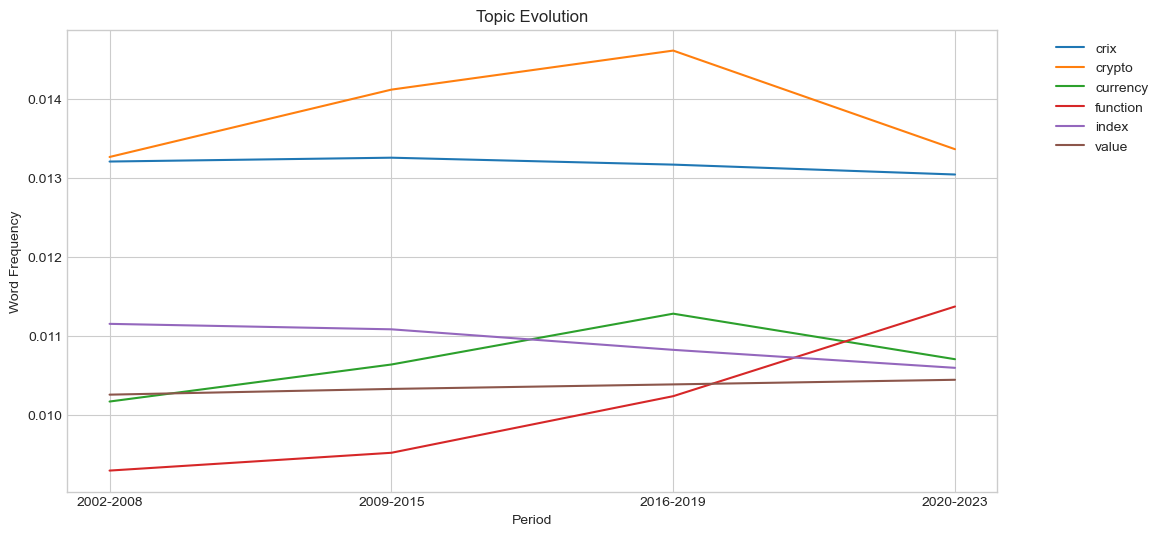

In [119]:
import matplotlib.pyplot as plt

# Plotting parameters
plt.figure(figsize=(12, 6))
plt.title('Topic Evolution')
plt.xlabel('Period')
plt.ylabel('Word Frequency')

# Iterate over each word
for word in top_k_words_topics_overtime[7].index:
    frequencies = top_k_words_topics_overtime[7].loc[word].values
    plt.plot(top_k_words_topics_overtime[7].columns, frequencies, label=word)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('plots/topic8_evolution.png')

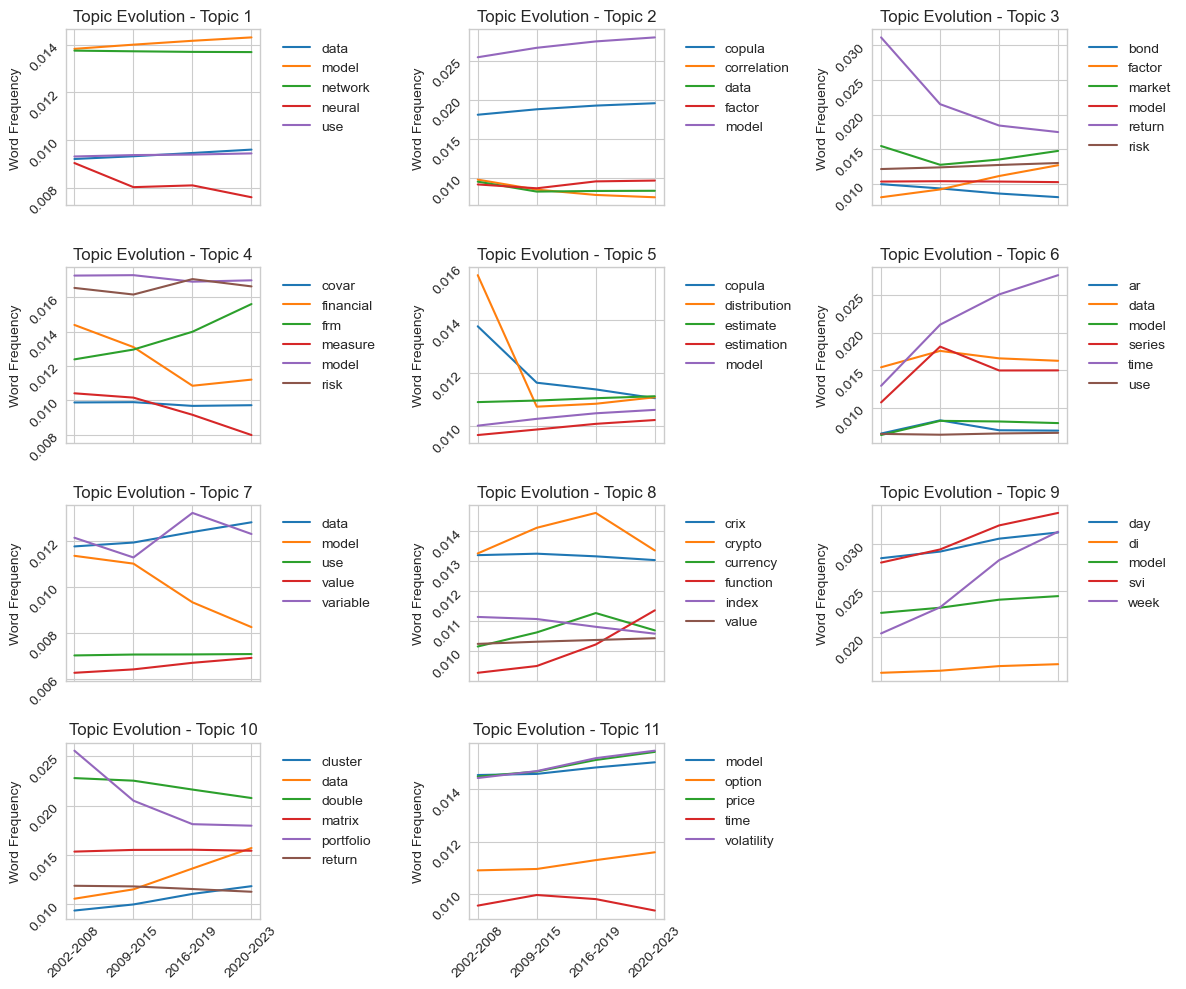

In [130]:
# Set the number of rows and columns for subplots
num_rows = 4
num_cols = 3

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 10), sharex=True)

# Reshape the axs array
axs = axs.reshape(-1)

# Iterate over each element in topics_words_time
for i, df in enumerate(top_k_words_topics_overtime):
    # Select the subplot for the current element
    ax = axs[i]

    # Plotting parameters for the current subplot
    ax.set_title(f'Topic Evolution - Topic {i+1}')
    #ax.set_xlabel('Period')
    ax.set_ylabel('Word Frequency')

    # Iterate over each word
    for word in df.index:
        frequencies = df.loc[word].values
        ax.plot(df.columns, frequencies, label=word)
    
    ax.tick_params(labelrotation=45)
    # Add legend and grid to the current subplot
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)

axs.flat[-1].set_visible(False) # to remove last plot
# Adjust spacing between subplots
plt.tight_layout()

plt.savefig('plots/topics_evolution.png')
# Show the figures
plt.show()